In [23]:
import pandas as pd
import numpy as np

In [24]:
fileloc= '/content/sample_data/data_set/'

In [25]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.metrics import davies_bouldin_score

In [26]:
shilout=np.zeros((56,20)) # used to store best silhouette_score for all features on 56 projects

dbinx=np.zeros((56,20))  # used to store best davies_bouldin_score for all features on 56 projects

otnoc=np.zeros((56,20))  # used to store optimal number of clusters using silhouette_score for all features on 56 projects

otnoc1=np.zeros((56,20))  # used to store optimal number of clusters using davies_bouldin_score for all features on 56 projects

In [27]:
for i in range(1,57): # for project 1 to 57

  fname=fileloc+str(i)+'.csv'
  data=np.genfromtxt(fname,delimiter=',')

  for j in range(0,20): # for feature 0 to 19

    sv=np.zeros((9))

    dbv=np.zeros((9))
    
    for k in range(2,11): # for cluster 2 to 10
      if np.shape(np.unique(data[:,j]))[0]>k:

        kmeans = KMeans(n_clusters=k, random_state=0).fit(data[:,j].reshape(-1,1))

        sv[k-2]=silhouette_score(data[:,j].reshape(-1,1),kmeans.labels_,metric='euclidean')

        dbv[k-2]=davies_bouldin_score(data[:,j].reshape(-1,1),kmeans.labels_)


    s1=np.max(sv) # find best silhouette_score

    s2=np.argmax(sv) # find optimal number of cluster

    shilout[i-1,j]=s1

    otnoc[i-1,j]=s2+2

    s1=np.min(dbv) #min db index

    s2=np.argmin(dbv) #optimal cluster corresponding to min value

    dbinx[i-1,j]=s1

    otnoc1[i-1,j]=s2+2

fname=fileloc+'shilout.csv' # save shilout value

np.savetxt(fname,shilout, delimiter=',', fmt='%f')  

fname=fileloc+'dbinx.csv' # save db_index value

np.savetxt(fname,dbinx, delimiter=',', fmt='%f')  

fname=fileloc+'best_cluster_shil.csv' # save optimal number of cluster

np.savetxt(fname,otnoc, delimiter=',', fmt='%f')  

fname=fileloc+'best_cluster_dbinx.csv' # save optimal number of cluster based on db_index

np.savetxt(fname,otnoc1, delimiter=',', fmt='%f')

**Visualization Section**


In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
file_location = '/content/sample_data/data_set/'

**Box plot of Silhouette Coefficient** 

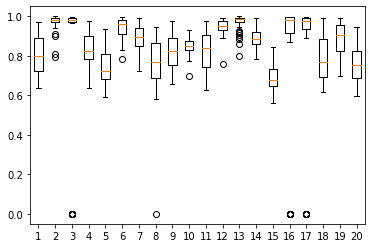

<Figure size 432x288 with 0 Axes>

In [99]:
shilout_data = np.genfromtxt(fileloc+'shilout.csv', delimiter =',')
plt.boxplot(shilout_data)
plt.show()
plt.savefig("/content/sample_data/data_set/shilout_data.png")

**Box plot of Davies–Bouldin index** 

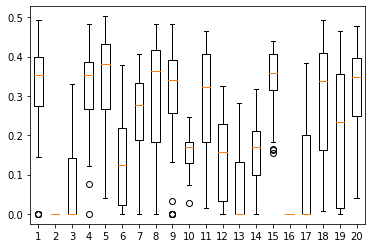

<Figure size 432x288 with 0 Axes>

In [100]:
dbinx_data = np.genfromtxt(fileloc+'dbinx.csv', delimiter =',')
plt.boxplot(dbinx_data)
plt.show()
plt.savefig("/content/sample_data/data_set/dbinx_data.png")

**Box plot of optimal number of clusters using the Silhouette Coefficient**

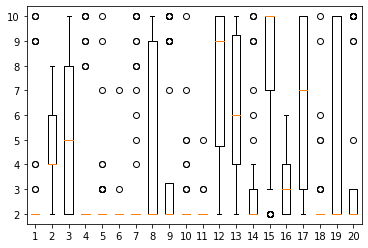

<Figure size 432x288 with 0 Axes>

In [101]:
shilout_cluster = np.genfromtxt(fileloc+'best_cluster_shil.csv', delimiter =',')
plt.boxplot(shilout_cluster)
plt.show()
plt.savefig("/content/sample_data/data_set/best_cluster_shil.png")

**Box plot of optimal number of clusters using the Davies–Bouldin index**

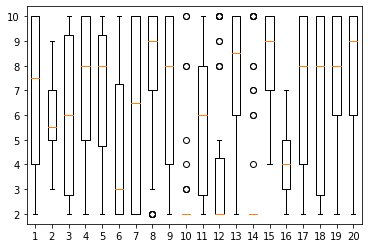

<Figure size 432x288 with 0 Axes>

In [102]:
dbinx_cluster = np.genfromtxt(fileloc+'best_cluster_dbinx.csv', delimiter =',')
plt.boxplot(dbinx_cluster)
plt.show()
plt.savefig("/content/sample_data/data_set/best_cluster_dbinx.png")

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
file_location = '/content/sample_data/data_set/'

**Histogram plot of Silhouette Coefficient** 

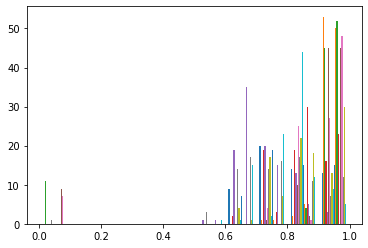

<Figure size 432x288 with 0 Axes>

In [104]:
shilout_data_histogram = np.genfromtxt(fileloc+'shilout.csv', delimiter =',')
plt.hist(shilout_data_histogram)
plt.show()
plt.savefig("/content/sample_data/data_set/shilout_data_histo.png")

**Histogram plot of Davies–Bouldin index** 

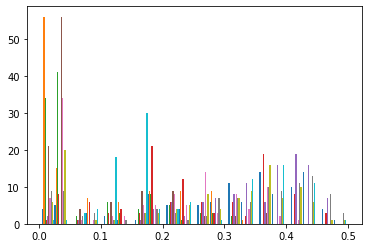

<Figure size 432x288 with 0 Axes>

In [106]:
dbinx_data_histogram = np.genfromtxt(fileloc+'dbinx.csv', delimiter =',')
plt.hist(dbinx_data_histogram)
plt.show()
plt.savefig("/content/sample_data/data_set/dbinx_data_histo.png")

**Histogram plot of optimal number of clusters using the Silhouette Coefficient**

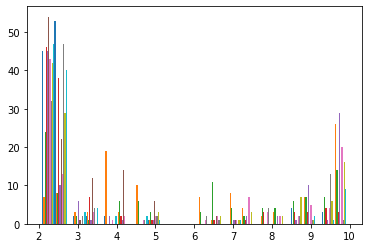

<Figure size 432x288 with 0 Axes>

In [107]:
shilout_cluster_histogram = np.genfromtxt(fileloc+'best_cluster_shil.csv', delimiter =',')
plt.hist(shilout_cluster)
plt.show()
plt.savefig("/content/sample_data/data_set/best_cluster_shil_histo.png")

**Histogram plot of optimal number of clusters using the Davies–Bouldin index**

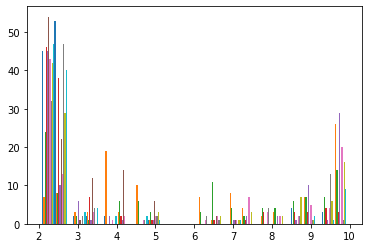

<Figure size 432x288 with 0 Axes>

In [108]:
db_cluster_histogram = np.genfromtxt(fileloc+'best_cluster_dbinx.csv', delimiter =',')
plt.hist(shilout_cluster_histogram)
plt.show()
plt.savefig("/content/sample_data/data_set/best_cluster_dbinx_histo.png")